# Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer

from scipy.stats import skew


In [3]:
data_constant = pd.read_csv('./water_potability.csv') #because I will be manipulating 'data' a lot,
#it is useful to have the dataloaded in a seperate dataframe which never gets changed
data = pd.read_csv('./water_potability.csv')

In [4]:
data.head(15)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


The first thing we notice above is that there are missing values in 'ph' and 'Sulfate'.


## Missing Data

In this section, we fill in the missing data values.

In [5]:
data_is_none = data.isnull().sum()
missing_data = pd.DataFrame({"Number of missing values": data_is_none})

missing_data.head(10)

,Number of missing values
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


### Imputing missing values


To impute missing values, we use KKNImputer from sklearn, which fills in the missing values using the k-nearest neighbors approach

In [6]:
imputer = KNNImputer(weights='uniform')

In [7]:
data = imputer.fit_transform(data)

Double check our code worked:

In [8]:
#convert it back to a dataframe
data = pd.DataFrame(data, columns=data_constant.columns)
data_is_none = data.isnull().sum()
missing_data = pd.DataFrame({"Number of missing values": data_is_none})
print(missing_data)

                 Number of missing values
ph                                      0
Hardness                                0
Solids                                  0
Chloramines                             0
Sulfate                                 0
Conductivity                            0
Organic_carbon                          0
Trihalomethanes                         0
Turbidity                               0
Potability                              0


## Normalizing the data

In [9]:
data_array = data.to_numpy() #keeping data as a dataframe to make it accessible for future use

In [10]:
scaler = StandardScaler() #this will be used to normalize the data
x_data = data_array[:,:-1]
x_data = scaler.fit_transform(x_data)
y_data = data_array[:,-1].ravel() #to make it a 1d array

# Training the models

First we just seperate our data into training and test data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

Now we import our models

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [14]:
print(lr.score(x_test, y_test))

0.6173780487804879


That score is not particularly good. We can see why when with further analysis

# Iteration
The above numbers might not sound *terrible*, but look at what the model is actually predicting. We can break up the answer data into two ararys: those which are class 0 and class 1. We do the same for the model predictions

In [15]:
def countModelPredictions(model, x_test, y_test):
    test_predictions = model.predict(x_test)
    numCorrectOnes = 0
    numFalseOnes = 0
    numCorrectZeros = 0
    numFalseZeros = 0
    for i in range(len(test_predictions)):
        if test_predictions[i] == 1 and y_test[i] == 1:
            numCorrectOnes += 1
        elif test_predictions[i]==1 and y_test[i] == 0:
            numFalseOnes += 1
        elif test_predictions[i]==0 and y_test[i]==0:
            numCorrectZeros += 1
        else:
            numFalseZeros += 1
    print("Predicted " + str(numCorrectOnes) + " correct ones")
    print("Predicted " + str(numFalseOnes) + " false ones")
    print("Predicted " + str(numCorrectZeros) + " correct zeros")
    print("Predicted " + str(numFalseZeros) + " false zeros")

In [16]:
countModelPredictions(lr, x_test, y_test)

Predicted 0 correct ones
Predicted 1 false ones
Predicted 405 correct zeros
Predicted 250 false zeros


As you can see, the model basically just predicts that every value is a zero. We can look in our data and see that it is actually somewhat unbalanced.

In [17]:
print("Number of zeros in the data: " + str(len(data[data['Potability']==0])))
print("Number of ones in the data: " + str(len(data[data['Potability']==1])))

Number of zeros in the data: 1998
Number of ones in the data: 1278


### Class weighting
Our data is unbalanced, but it does not seem to be unworkable. We could remove the extra data points with 0-labels from our dataset, but that might not be necessary.
We first use class weighting, which is built into scikit-learn

Class-weighting is a built-in parameter to scikit-learns LogisticRegression class.

In [18]:
lr = LogisticRegression(class_weight='balanced')

In [19]:
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [20]:
countModelPredictions(lr, x_test, y_test)

Predicted 128 correct ones
Predicted 210 false ones
Predicted 196 correct zeros
Predicted 122 false zeros


As we can see above, the model is now **significantly more accurate** when predicting the label is 1 (previously it would have guess almost all of them were 0's).
However, that has come at the cost of overall accuracy. There is still a very significant number of missed ones, and our overall accuracy has been reduced:

In [21]:
print("Models score: " + str(lr.score(x_test, y_test)))

Models score: 0.49390243902439024


## Removing extra labels
Since we have too many data points that are labelled 0, one approach is to remove the extra so that the number of 1-labels and 0-labels is equal. However, that never yields more than 55% accuracy

In [22]:
data_zeros = data[data['Potability']==0]
data_zeros = data_zeros.sample(frac=15/24)
data_ones = data[data['Potability']==1]
data_zeros.head(20)
data_balanced = pd.concat([data_zeros, data_ones]).sample(frac=1).reset_index(drop=True).to_numpy()
x_balanced = data_balanced[:,:-1]

scaler = StandardScaler()
x_balanced = scaler.fit_transform(x_balanced)
y_balanced = data_balanced[:,-1:].ravel()

x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(x_balanced, y_balanced, test_size=0.2)

lr = LogisticRegression()
lr.fit(x_train_balanced, y_train_balanced)
print(lr.score(x_test_balanced, y_test_balanced))

countModelPredictions(lr, x_train_balanced, y_train_balanced)

0.5039525691699605
Predicted 709 correct ones
Predicted 647 false ones
Predicted 346 correct zeros
Predicted 319 false zeros


After extensively testing the hyperparameters in the model, we found that the score doesn't really go past this number, so we have reached the upper limit of what can be achieved simply with scikit-learn's LogisticRegression.

### Support vector machines

Another thing we can try is support vector machines rather than logistic regression. We will also try ensemble methods to see if that affects the accuracy

In [23]:
from sklearn.svm import LinearSVC

In [24]:
y_train = y_train * 2 - 1 #Since support vector machines use -1 and 1's as the data labels, we are converting our data labels from 0 and 1 to -1 and 1
y_test = y_test * 2 -1

svc = LinearSVC(dual=False)


svc.fit(x_train, y_train)
print(svc.score(x_test, y_test))

0.6173780487804879


While that is a little better, lets see if it is accurately predicting ones:

In [25]:
def countModelPredictions_SVC(model, x_test, y_test):
    #we are re-writing this function for SVC's since SVCs use -1 and 1 rather than 0 and 1
    test_predictions = model.predict(x_test)
    numCorrectOnes = 0
    numFalseOnes = 0
    numCorrectZeros = 0
    numFalseZeros = 0
    for i in range(len(test_predictions)):
        if test_predictions[i] == 1 and y_test[i] == 1:
            numCorrectOnes += 1
        elif test_predictions[i]==1 and y_test[i] == -1:
            numFalseOnes += 1
        elif test_predictions[i]==-1 and y_test[i]==-1:
            numCorrectZeros += 1
        else:
            numFalseZeros += 1
    print("Predicted " + str(numCorrectOnes) + " correct ones")
    print("Predicted " + str(numFalseOnes) + " false ones")
    print("Predicted " + str(numCorrectZeros) + " correct zeros")
    print("Predicted " + str(numFalseZeros) + " false zeros")

In [26]:
countModelPredictions_SVC(svc, x_test, y_test)

Predicted 0 correct ones
Predicted 1 false ones
Predicted 405 correct zeros
Predicted 250 false zeros


In [27]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier

In [28]:
ada_SVCclassifier = AdaBoostClassifier(estimator=LinearSVC(dual='auto'), n_estimators=50, algorithm='SAMME', random_state=1)
ada_SVCclassifier.fit(x_train, y_train)
ada_SVCclassifier.score(x_test, y_test)

ada_LRclassifier = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=50)
ada_LRclassifier.fit(x_train, y_train)

print("Ada boost SVC score: ", ada_SVCclassifier.score(x_test, y_test))
print("Ada boost Logistic Regression score: ", ada_LRclassifier.score(x_test, y_test))

Ada boost SVC score:  0.6173780487804879
Ada boost Logistic Regression score:  0.6173780487804879


# Analysis

Below, we are trying to see if there is any correlation between the values of the different features and the outcome

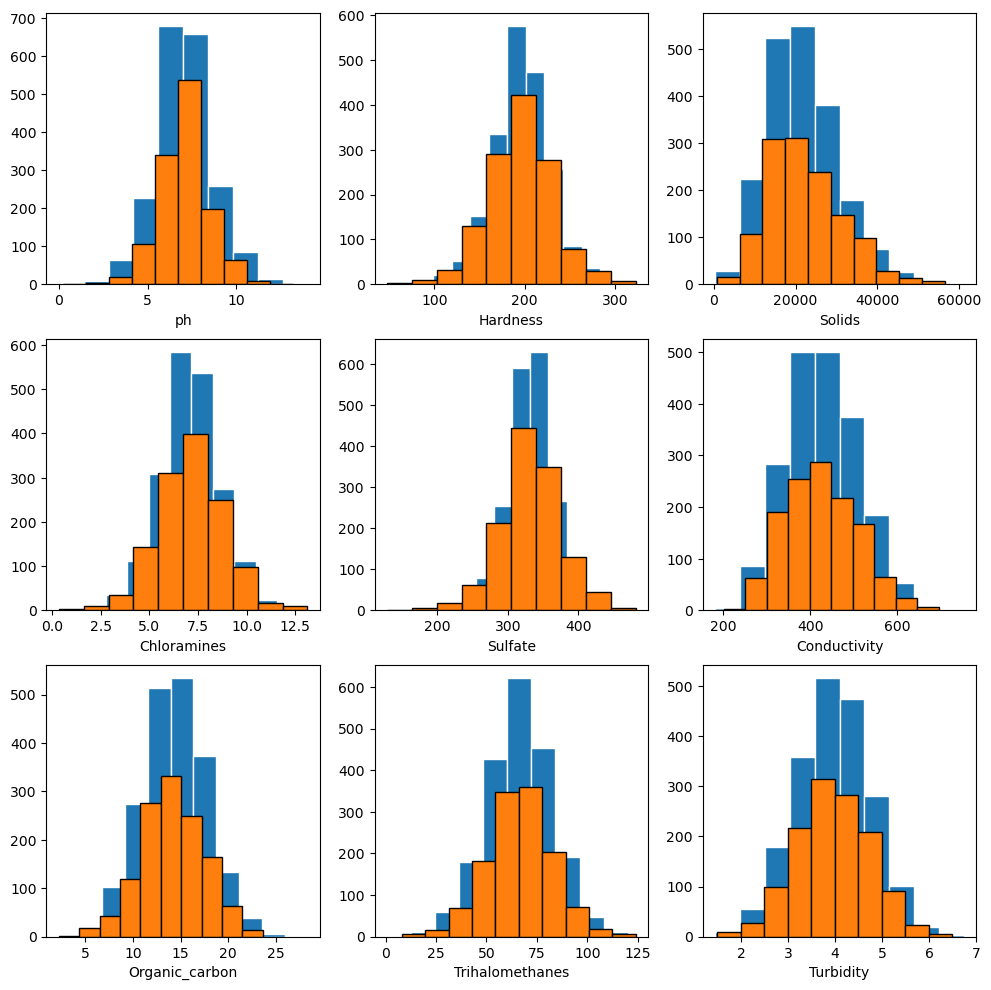

In [29]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for i in range(len(ax)):
    x_corresponding_to_0 = data_array[data_array[:,-1] == 0][:,:-1]
    x_corresponding_to_1 = data_array[data_array[:,-1] == 1][:-1]
    for j in range(len(ax)):
        ax[i, j].hist(x_corresponding_to_0[:,3*i+j], edgecolor='white')
        ax[i, j].hist(x_corresponding_to_1[:,3*i+j], edgecolor='black')
        ax[i,j].set(xlabel=data.columns[3*i+j])

plt.show()

We can see very clearly here that the distributions of the values of each feature is more or less the same for both the non-potable and the potable water. Combined with poor results we got from our models, this leads us to conclude that there is not a very strong correlation between the data features and the outcome.